In this Notebook we will visually display the correlation data obtained in 01_exploreBestParameters.ipynb. This will allow us to define the best optimisation parameters to compute the final ensemble of chromatin 3D models.


# Libraries and functions

In [1]:
import sys

# Parameters to modify

In [2]:
## Data Paths (Location of the base folder downloaded from GitHub)
basePath = '/home/julen/TADdyn/TADdyn_tutorial/'

# This notebook requires further changes in the section "Generate file 
# with top parameters" to select the best paramteres for the modelling

# Run 

## Define additional paths 

In [3]:
scriptsPath = basePath + 'code/modellingScripts/'
GeneralOptimOutPath = basePath + 'optimization/'

## Import additional libraries 

In [4]:
sys.path.append(basePath + 'code')
import fileHandling
import plotting
sys.path.append(basePath + 'code/modellingScripts')
import Check_optimization

## Get matrix paths 

In [5]:
matricesLength, regionsAll, matrices = fileHandling.getMatricesPaths(basePath, starting='Matrix')

## Join output files 

To be more clean and have the results more handy, we will combine the correlation values splited in each parameter combination file into a single file per different dcutoff values.

In [6]:
for regi in regionsAll:
    print('--- %s ---' %regi)
    for cell in matrices:
        print('## %s ##' %(cell))
        scriptp = basePath + 'code/modellingScripts/optTXTparser.py'
        inPath = '/'.join(matrices[cell][regi].split('/')[:-1]) + '/'
        outPath = basePath + 'optimization/%s/%s/' %(cell, regi)
        # create folder if absent
        ! mkdir -p {outPath}
        # run script
        ! python {scriptp} -pi {inPath} -po {outPath} -j yes

--- b-globin ---
## nCD4 ##
##############################
/home/julen/TADdyn/TADdyn_tutorial/optimization/nCD4/b-globin/
## Ery ##
##############################
/home/julen/TADdyn/TADdyn_tutorial/optimization/Ery/b-globin/
C200.0 40
C100.0 40
C400.0 10
C300.0 30
## Mon ##
##############################
/home/julen/TADdyn/TADdyn_tutorial/optimization/Mon/b-globin/


## Check best dcutoff 

This step allows us to decide the optimal dcutoff for the modelling. In this example we just prepared the optimisation in one interaction matrix (b-globin of Ery). See how the correlation values descend when increasing and decreasing the dcutoff value. In this case a dcutoff of 300 would be the best option, since its correlation values are higher than values above and bellow.  
However, when interaction matrices from different cell type or stages want to be compared, even if not the optimal in all, we should select a dcutoff that fits best all the matrices. This will facilitate future analysis.  

In this paper, we found that dcutoff 200 was working best for the 3 cell lines, so we selected it for the next steps.

--- b-globin ---
## nCD4 ##
No files in nCD4_b-globin
## Ery ##
300.0	1


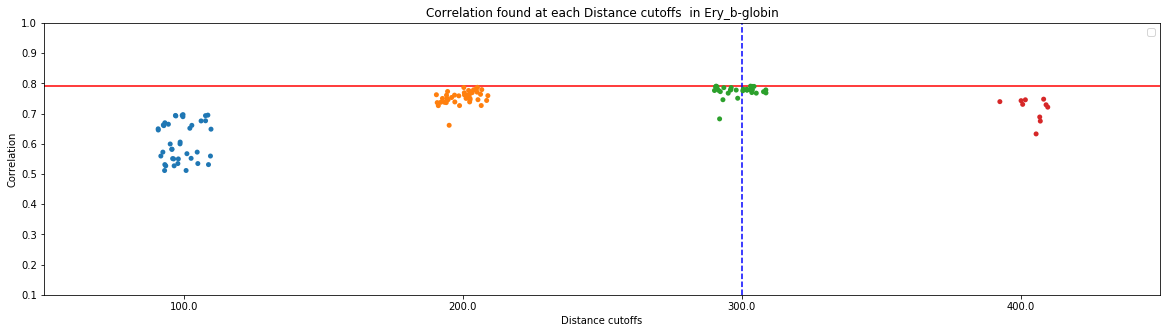

## Mon ##
No files in Mon_b-globin


In [7]:
for regi in regionsAll:
    print('--- %s ---' %regi)
    for cell in matrices:
        print('## %s ##' %(cell))
        optimPaths = [basePath + 'optimization/%s/%s/' %(cell, regi)]
        topCor = Check_optimization.checkAll(GeneralOptimOutPath, optimPaths, show_dcut=True, 
                                             dcut=False, topModels=False)

## Check best maxdist 

--- b-globin ---
## nCD4 ##
No files in nCD4_b-globin
## Ery ##
300.0	1


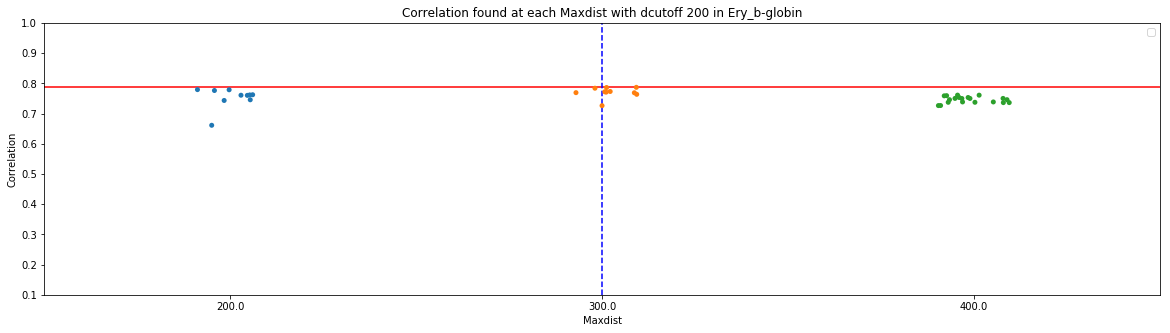

## Mon ##
No files in Mon_b-globin


In [8]:
for regi in regionsAll:
    print('--- %s ---' %regi)
    for cell in matrices:
        print('## %s ##' %(cell))
        optimPaths = [basePath + 'optimization/%s/%s/' %(cell, regi)]
        topCor = Check_optimization.checkAll(GeneralOptimOutPath, optimPaths, show_dcut=False, 
                                             dcut=200, topModels=False)

## Generate file with top parameters 

We will create a file called modellinParams.txt in the optimisation folder before the folders of each cell and region. This file will contain the parameters with the top correlation for the given dcutoff and maxdist. These files are created to facilitate the modelling process, but the selected parameter combinations should be checked in advance to running the final modelling step.   

In the case of Ery, the best combination of paramteres for the final ensemble of models was set to:  
dcutoff = 200  
maxdist = 300  
lowfreq = 0.0  
upfreq = 0.0

In [9]:
## MODIFY THIS VALUES ACCORDING TO YOUR RESULTS
# gather top dcutoff and maxdist parameters
topDuctoff = 200
topMaxdist = 300


## get file with top optimization paramteres to model
inputPaths = [[],[]]
for regi in regionsAll:
    for cell in matrices:
        matrixPaths = matrices[cell][regi]
        optimPaths = basePath + 'optimization/%s/%s/' %(cell, regi)
        inputPaths[0] += [matrixPaths]
        inputPaths[1] += [optimPaths]
        

        
topModels = '%s_%s' %(topDuctoff, topMaxdist)
topCorrelations=Check_optimization.checkAll(GeneralOptimOutPath, [inputPaths[0],
                                                                  inputPaths[1]], 
                                            show_dcut=False, dcut=False, topModels=topModels)

/home/julen/TADdyn/TADdyn_tutorial/optimization/nCD4/b-globin/
/home/julen/TADdyn/TADdyn_tutorial/optimization/Ery/b-globin/
200.0 300.0
/home/julen/TADdyn/TADdyn_tutorial/optimization/Mon/b-globin/


In [10]:
print topCorrelations

{'Ery': {'b-globin': [300.0, 0.0, 0.0, 200.0, 0.7869859924901681]}}


## Ensure top parameters make sense

With these plots we will make sure that the best corrrelation is not an outlier. The best correlation should usually be surrounded by, or nearby to, other top ranked correlation values in the following plots

/home/julen/TADdyn/TADdyn_tutorial/optimization/Ery/b-globin/ValOptimisationC200.0.txt


{'maxdist': 300.0, 'upfreq': 0.0, 'dcutoff': 200.0, 'kforce': 5, 'reference': '', 'lowfreq': 0.0, 'scale': 0.01, 'kbending': 0.0}
200.0


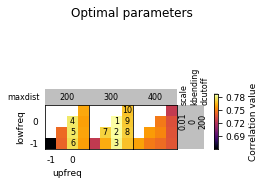

/home/julen/TADdyn/TADdyn_tutorial/optimization/Ery/b-globin/ValOptimisationC300.0.txt


{'maxdist': 400.0, 'upfreq': 0.0, 'dcutoff': 300.0, 'kforce': 5, 'reference': '', 'lowfreq': -0.5, 'scale': 0.01, 'kbending': 0.0}
300.0


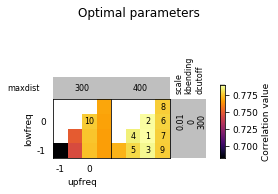

/home/julen/TADdyn/TADdyn_tutorial/optimization/Ery/b-globin/ValOptimisationC100.0.txt


{'maxdist': 200.0, 'upfreq': 0.0, 'dcutoff': 100.0, 'kforce': 5, 'reference': '', 'lowfreq': -0.5, 'scale': 0.01, 'kbending': 0.0}
100.0


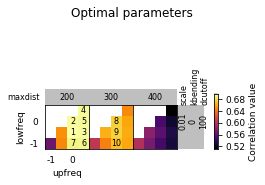

/home/julen/TADdyn/TADdyn_tutorial/optimization/Ery/b-globin/ValOptimisationC400.0.txt


{'maxdist': 400.0, 'upfreq': 0.5, 'dcutoff': 400.0, 'kforce': 5, 'reference': '', 'lowfreq': 0.5, 'scale': 0.01, 'kbending': 0.0}
400.0


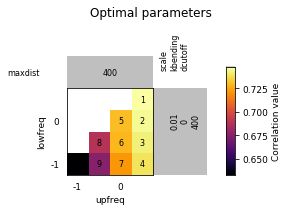

In [11]:
# Here we define the number of models we did in the optimisation, and how many of them we kept
nmodels = 100
nkeep = 100  

for nm, matPath in enumerate(inputPaths[0]):
    plotting.optimPlot1(matPath, inputPaths[1][nm], nmodels = nmodels, nkeep = nkeep)
